In [1]:
# Standard stuff
import numpy as np                              #For almost everything
import matplotlib.pyplot as plt                 #For plotting
from matplotlib.colors import ListedColormap
import matplotlib.gridspec as gridspec
from matplotlib.backends.backend_pdf import PdfPages       #For saving figures to single pdf
figlist = []

#*******************************************************************************************************
#Setting RC Parameters for figure size and fontsizes
import matplotlib.pylab as pylab                           
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (20, 10),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)
#********************************************************************************************************
mList = ['o','v','^','<','>','s','p','*','H','+','X','D']
cList = ['#0072b2','#009e73','#d55e00','#cc79a7','#56b4e9']
cmap = ListedColormap([np.array([0, 114.0/256, 178.0/256, 1]),
                       np.array([0, 158.0/256, 115.0/256, 1]),
                       np.array([213.0/256, 94.0/256, 0, 1]),
                       np.array([204.0/256, 121.0/256, 167.0/256, 1]),
                       np.array([86.0/256, 180.0/256, 233.0/256, 1])])

In [2]:
Trans = np.loadtxt('/home/controls/Git/cit_ctnlab/ctn_labdata/data/20190430SCReflRFoutSpec/SCAV_RFOUT_Spectrum_Triggered_By_MixerCh37MHz_Span_1_2MHz_RBW30kHz_30-04-2019_171740_CH1TS.txt',delimiter=',')
OUT1 = np.loadtxt('/home/controls/Git/cit_ctnlab/ctn_labdata/data/20190430SCReflRFoutSpec/SCAV_RFOUT_Spectrum_Triggered_By_MixerCh37MHz_Span_1_2MHz_RBW30kHz_30-04-2019_171740_CH2TS.txt',delimiter=',')
MixerCh = np.loadtxt('/home/controls/Git/cit_ctnlab/ctn_labdata/data/20190430SCReflRFoutSpec/SCAV_RFOUT_Spectrum_Triggered_By_MixerCh37MHz_Span_1_2MHz_RBW30kHz_30-04-2019_171740_CH3TS.txt',delimiter=',')
Trigger = np.loadtxt('/home/controls/Git/cit_ctnlab/ctn_labdata/data/20190430SCReflRFoutSpec/SCAV_RFOUT_Spectrum_Triggered_By_MixerCh37MHz_Span_1_2MHz_RBW30kHz_30-04-2019_171740_CH4TS.txt',delimiter=',')

In [3]:
Transpk = max(Trans[:,1])
OUT1pkpk = (max(OUT1[:,1])-min(OUT1[:,1]))*1e3
MixerChpkpk = (max(MixerCh[:,1])-min(MixerCh[:,1]))*1e3

In [4]:
for ii,trig in enumerate(Trigger[:,1]):
    if trig>2.6:
        break
TriggerInd = ii
FFTtime=17.37   #ms

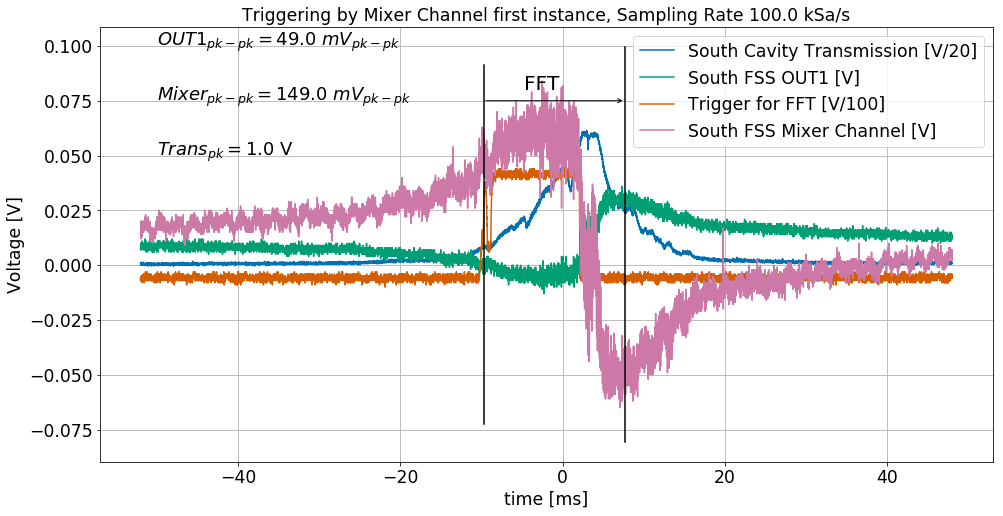

In [5]:
tt = Trans[:,0]*1e3
SR = 1/(tt[1]-tt[0])
fig = plt.figure(figsize=[16,8])
ax = fig.gca()
ax.plot(tt,Trans[:,1]/20, color = cList[0],label=r'South Cavity Transmission [V/20]')
ax.plot(tt,OUT1[:,1], color = cList[1],label=r'South FSS OUT1 [V]')
ax.plot(tt,Trigger[:,1]/100, color = cList[2],label=r'Trigger for FFT [V/100]')
ax.plot(tt,MixerCh[:,1], color = cList[3],label=r'South FSS Mixer Channel [V]')

ax.plot(np.ones(2)*tt[TriggerInd],ax.get_ylim(),color='k')
ax.plot(np.ones(2)*(tt[TriggerInd]+FFTtime),ax.get_ylim(),color='k')
ax.annotate("",xytext=(tt[TriggerInd],0.075),xy=(tt[TriggerInd]+FFTtime,0.075),
            arrowprops=dict(arrowstyle="->"))
ax.text(tt[TriggerInd]+5,0.08,"FFT",fontsize=20)

ax.set_title('Triggering by Mixer Channel first instance, Sampling Rate '+str(np.round(SR,2))+' kSa/s')
ax.set_xlabel('time [ms]')
ax.set_ylabel('Voltage [V]')

ax.grid('on', which='both')
ax.grid(alpha=0.2, which='minor')
ax.legend()

ax.text(-50,0.1,r'$OUT1_{pk-pk} = $'+str(np.round(OUT1pkpk))+' $ mV_{pk-pk}$', fontsize=18)
ax.text(-50,0.075,r'$Mixer_{pk-pk} = $'+str(np.round(MixerChpkpk))+' $ mV_{pk-pk}$', fontsize=18)
ax.text(-50,0.05,r'$Trans_{pk} = $'+str(np.round(Transpk))+' V', fontsize=18)
figlist +=[fig]

In [6]:
Trans = np.loadtxt('/home/controls/Git/cit_ctnlab/ctn_labdata/data/20190430SCReflRFoutSpec/SCAV_RFOUT_Spectrum_Triggered_By_MixerCh37MHz_Span_1_2MHz_RBW30kHz_30-04-2019_171740_CH1TS_2.txt',delimiter=',')
OUT1 = np.loadtxt('/home/controls/Git/cit_ctnlab/ctn_labdata/data/20190430SCReflRFoutSpec/SCAV_RFOUT_Spectrum_Triggered_By_MixerCh37MHz_Span_1_2MHz_RBW30kHz_30-04-2019_171740_CH2TS_2.txt',delimiter=',')
MixerCh = np.loadtxt('/home/controls/Git/cit_ctnlab/ctn_labdata/data/20190430SCReflRFoutSpec/SCAV_RFOUT_Spectrum_Triggered_By_MixerCh37MHz_Span_1_2MHz_RBW30kHz_30-04-2019_171740_CH3TS_2.txt',delimiter=',')
Trigger = np.loadtxt('/home/controls/Git/cit_ctnlab/ctn_labdata/data/20190430SCReflRFoutSpec/SCAV_RFOUT_Spectrum_Triggered_By_MixerCh37MHz_Span_1_2MHz_RBW30kHz_30-04-2019_171740_CH4TS_2.txt',delimiter=',')

In [7]:
Transpk = max(Trans[:,1])
OUT1pkpk = (max(OUT1[:,1])-min(OUT1[:,1]))*1e3
MixerChpkpk = (max(MixerCh[:,1])-min(MixerCh[:,1]))*1e3

In [8]:
for ii,trig in enumerate(Trigger[:,1]):
    if trig>2.6:
        break
TriggerInd = ii
FFTtime=17.37   #ms

In [9]:
tt = Trans[:,0]*1e3
SR = 1/(tt[1]-tt[0])
fig = plt.figure(figsize=[16,8])
ax = fig.gca()
ax.plot(tt,Trans[:,1]/20, color = cList[0],label=r'South Cavity Transmission [V/20]')
ax.plot(tt,OUT1[:,1], color = cList[1],label=r'South FSS OUT1 [V]')
ax.plot(tt,Trigger[:,1]/100, color = cList[2],label=r'Trigger for FFT [V/100]')
ax.plot(tt,MixerCh[:,1], color = cList[3],label=r'South FSS Mixer Channel [V]')

ax.plot(np.ones(2)*tt[TriggerInd],ax.get_ylim(),color='k')
ax.plot(np.ones(2)*(tt[TriggerInd]+FFTtime),ax.get_ylim(),color='k')
ax.annotate("",xytext=(tt[TriggerInd],0.075),xy=(tt[TriggerInd]+FFTtime,0.075),
            arrowprops=dict(arrowstyle="->"))
ax.text(tt[TriggerInd]+5,0.08,"FFT",fontsize=20)

ax.set_title('Triggering by Mixer Channel second instance, Sampling Rate '+str(np.round(SR,2))+' kSa/s')
ax.set_xlabel('time [ms]')
ax.set_ylabel('Voltage [V]')

ax.grid('on', which='both')
ax.grid(alpha=0.2, which='minor')
ax.legend(loc=3)

ax.text(-50,0.08,r'$OUT1_{pk-pk} = $'+str(np.round(OUT1pkpk))+' $ mV_{pk-pk}$', fontsize=18)
ax.text(-50,0.06,r'$Mixer_{pk-pk} = $'+str(np.round(MixerChpkpk))+' $ mV_{pk-pk}$', fontsize=18)
ax.text(-50,0.04,r'$Trans_{pk} = $'+str(np.round(Transpk))+' V', fontsize=18)
figlist +=[fig]

In [10]:
Spec = np.loadtxt('/home/controls/Git/cit_ctnlab/ctn_labdata/data/20190430SCReflRFoutSpec/SCAV_RFOUT_Spectrum_Triggered_By_MixerCh37MHz_Span_1_2MHz_RBW30kHz_30-04-2019_171740.txt')

In [11]:
ff = Spec[:,0]/1e6
BW = 30e3
fig = plt.figure(figsize=[12,6])
ax = fig.gca()
ax.plot(ff,Spec[:,1]+20.0, color = cList[2])
#ax.plot(tt,MixerCh[:,1], color = cList[3],label=r'South FSS Mixer Channel [V]')

ax.set_title('RFout spectrum (Coupler loss adjusted), BW = '+str(np.round(BW/1e3))+' kHz')
ax.set_xlabel('Frequency [MHz]')
ax.set_ylabel('Power (50 $\Omega$ termination) [dBm]')

ax.grid('on', which='both')
ax.grid(alpha=0.2, which='minor')

RFpeak = max(Spec[:,1])+20.0
RFpeakpos = ff[np.argmax(Spec[:,1])]

RFpeak2 = max(Spec[:70,1])+20.0
RFpeak2pos = ff[np.argmax(Spec[:70,1])]


RFpeak3 = max(Spec[110:,1])+20.0
RFpeak3pos = ff[np.argmax(Spec[110:,1])+110]


ax.text(36.4,-20,'Maximum at '+str(np.round(RFpeakpos,2))+' MHz\nPeak value = '+str(np.round(RFpeak,2))+' dBm',fontsize=20)
ax.text(36.4,-35,'Secondary peak at '+str(np.round(RFpeak2pos,2))+' MHz\nPeak value = '+str(np.round(RFpeak2,2))+' dBm',fontsize=20)
ax.text(37.05,-35,'Secondary peak at '+str(np.round(RFpeak3pos,2))+' MHz\nPeak value = '+str(np.round(RFpeak3,2))+' dBm',fontsize=20)
ax.text(37.03,-20,str(np.round(RFpeak,2))+' dBm => '+str(np.round(np.sqrt((10**(RFpeak/10.0))*50e-3*8)*1e3,2))+' $mV_{pk-pk}$',fontsize=20)

figlist +=[fig]

In [12]:
pp = PdfPages('SCavReflRFoutSpecAnalysis.pdf')
for fig in figlist:
    pp.savefig(fig,bbox_inches='tight')
pp.close()